In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [35]:
house_prices_df = pd.read_csv("https://djl-lms-assets.s3.eu-central-1.amazonaws.com/datasets/house_prices.csv", sep = ";")
house_prices_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


__(1) Investigate the data and do any necessary data cleaning.__

In [36]:
house_prices_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [37]:
house_price = pd.DataFrame()
house_price = house_prices_df[['MSSubClass', 'MSZoning','LotArea','Street','LotShape','Neighborhood','BldgType','GrLivArea',
                               'OverallQual','YearBuilt','RoofStyle', 'HouseStyle' ,'TotalBsmtSF', 'Heating','TotRmsAbvGrd',
                               'Fireplaces','GarageCars','PoolArea', 'YrSold', 'SaleType','SaleCondition','FullBath',
                               'SalePrice']]

In [38]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MSSubClass     1460 non-null   int64 
 1   MSZoning       1460 non-null   object
 2   LotArea        1460 non-null   int64 
 3   Street         1460 non-null   object
 4   LotShape       1460 non-null   object
 5   Neighborhood   1460 non-null   object
 6   BldgType       1460 non-null   object
 7   GrLivArea      1460 non-null   int64 
 8   OverallQual    1460 non-null   int64 
 9   YearBuilt      1460 non-null   int64 
 10  RoofStyle      1460 non-null   object
 11  HouseStyle     1460 non-null   object
 12  TotalBsmtSF    1460 non-null   int64 
 13  Heating        1460 non-null   object
 14  TotRmsAbvGrd   1460 non-null   int64 
 15  Fireplaces     1460 non-null   int64 
 16  GarageCars     1460 non-null   int64 
 17  PoolArea       1460 non-null   int64 
 18  YrSold         1460 non-null

In [39]:
house_price.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
Neighborhood     0
BldgType         0
GrLivArea        0
OverallQual      0
YearBuilt        0
RoofStyle        0
HouseStyle       0
TotalBsmtSF      0
Heating          0
TotRmsAbvGrd     0
Fireplaces       0
GarageCars       0
PoolArea         0
YrSold           0
SaleType         0
SaleCondition    0
FullBath         0
SalePrice        0
dtype: int64

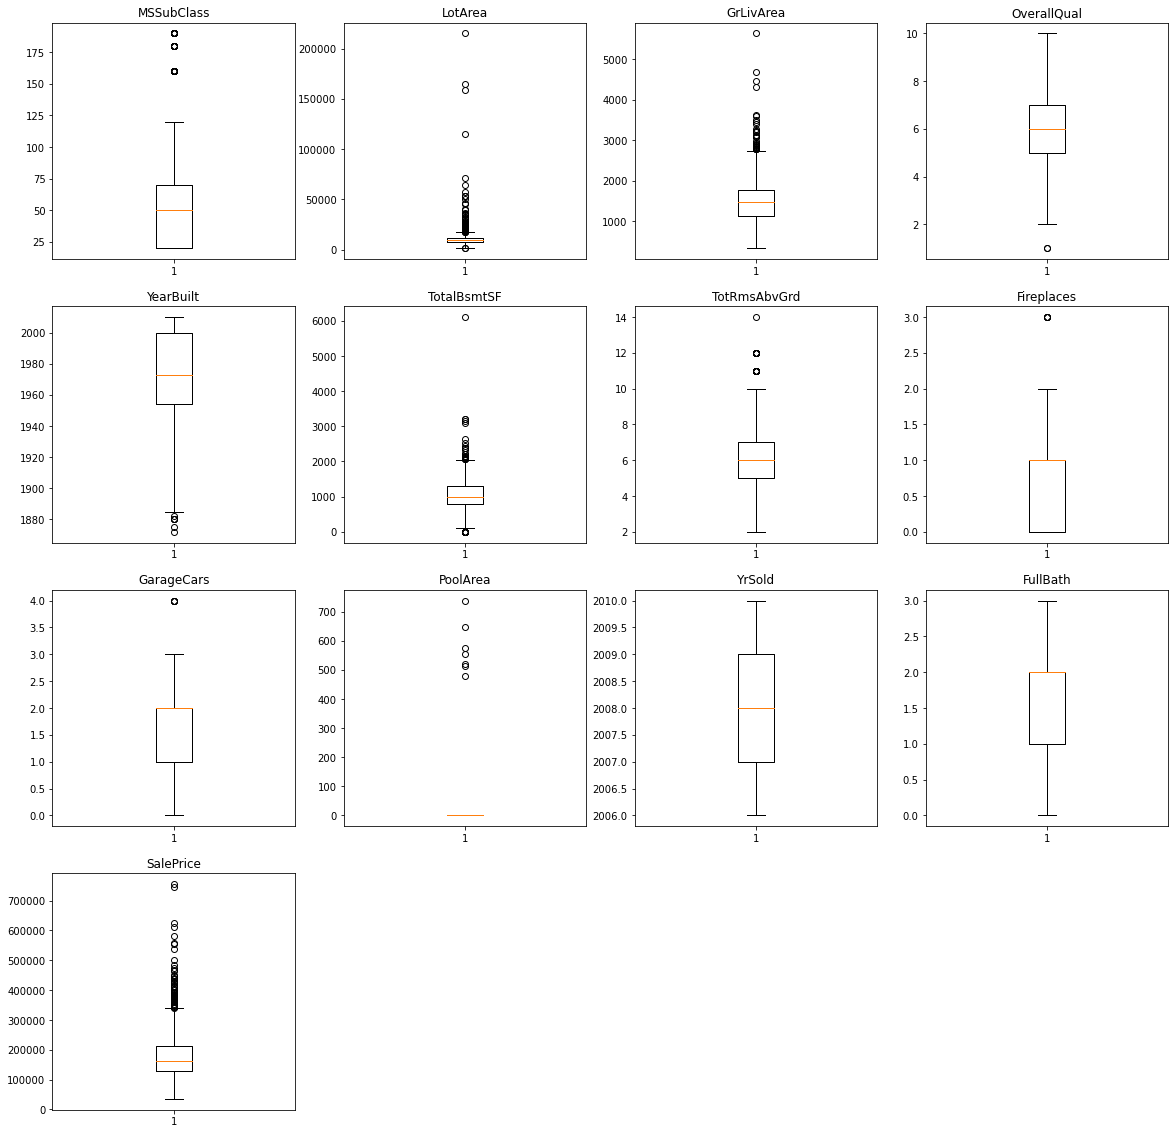

In [40]:
i = 1
plt.figure(figsize=(20,20))
for col in house_price.select_dtypes(exclude ='object').columns:
    plt.subplot(4,4,i)
    plt.boxplot(house_price[col])
    plt.title(col)
    i += 1 
plt.show()

__(2)Explore the data and find some variables that you think would be useful in the prediction of the house prices.__

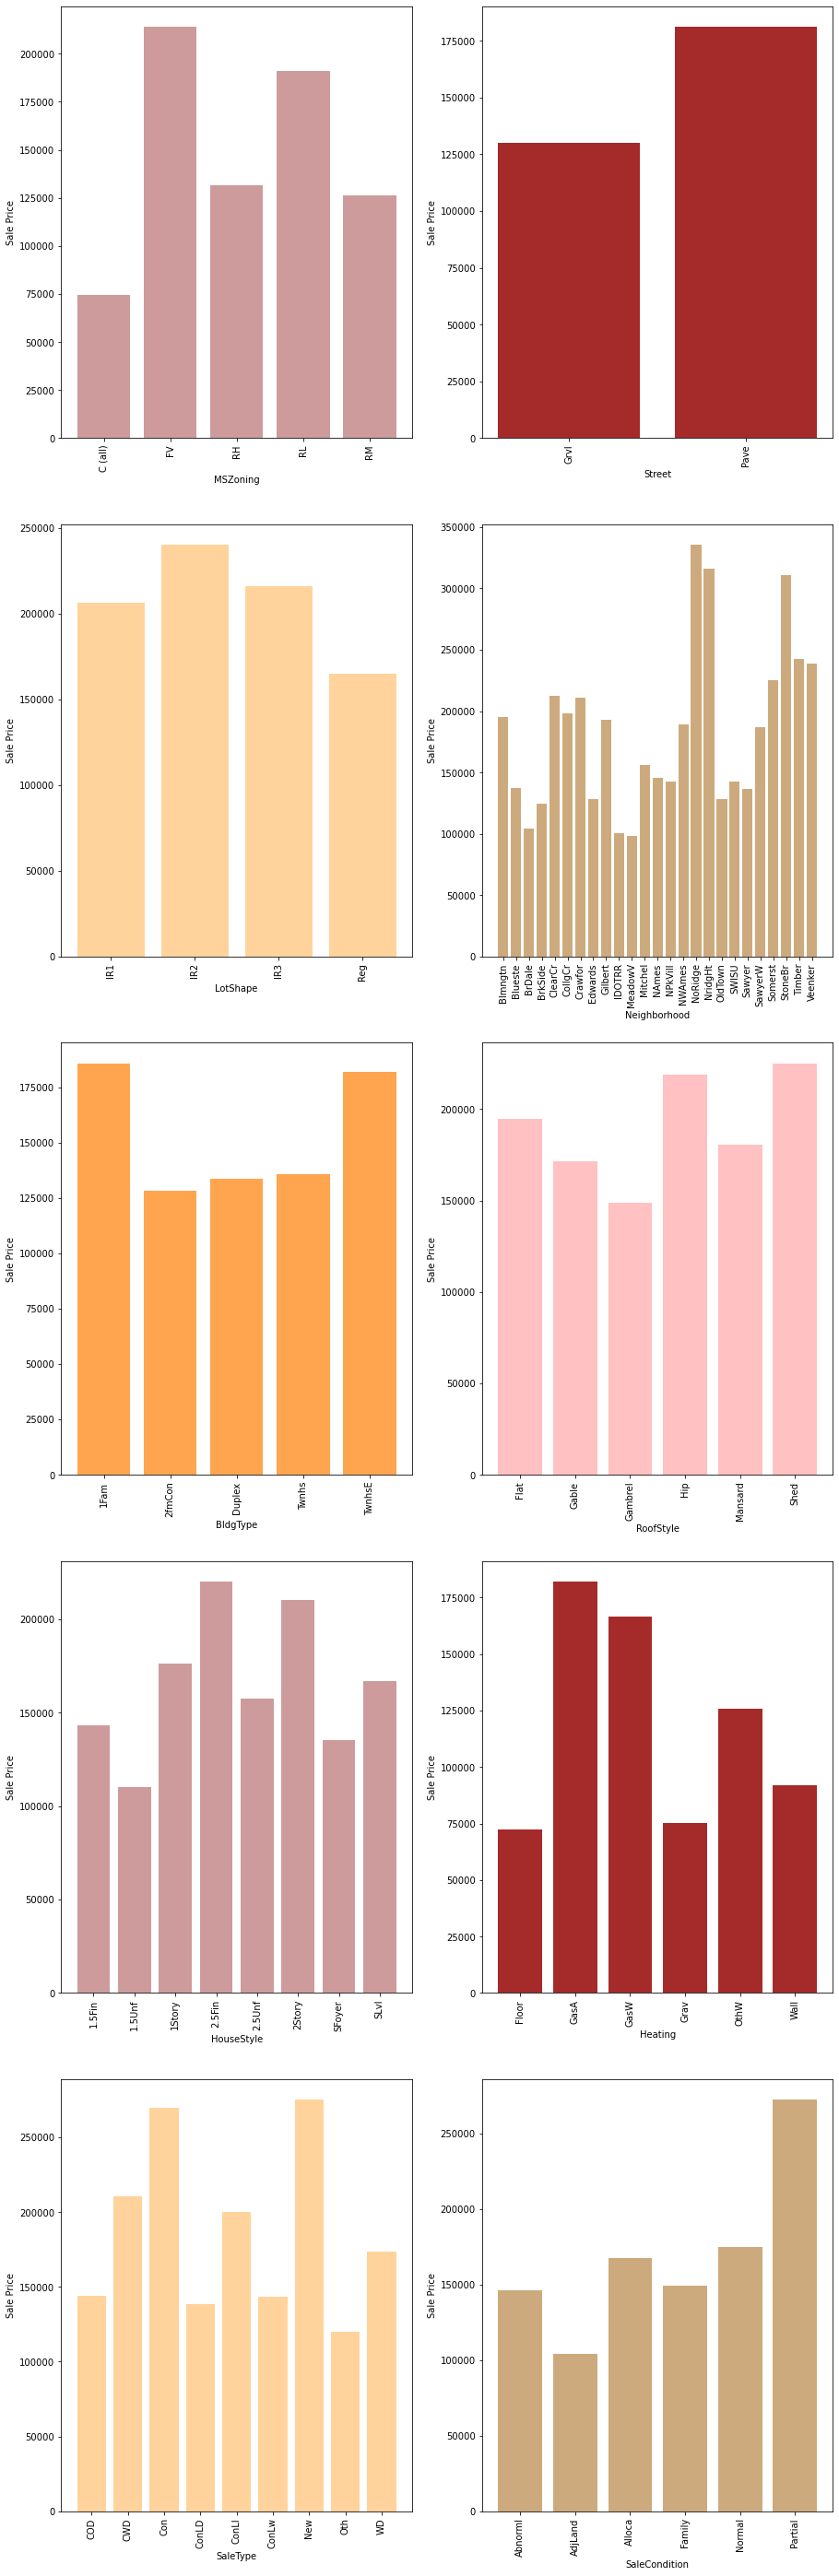

In [41]:
color =['#FFC1C1','#CD9B9B','#A52A2A','#FFD39B','#CDAA7D','#FFA54F']
i = 1
plt.figure(figsize=(15,50))
for col in house_price.select_dtypes(include='object').columns:
    plt.subplot(5,2,i)
    plt.bar(house_price.groupby(by=col)['SalePrice'].mean().index , 
        house_price.groupby(by=col)['SalePrice'].mean() , color = color[i%6] )
    plt.xlabel(col)
    plt.ylabel("Sale Price")
    plt.xticks(rotation=90)
    i += 1
plt.show()

In [42]:
house_price.select_dtypes(exclude='object').columns

Index(['MSSubClass', 'LotArea', 'GrLivArea', 'OverallQual', 'YearBuilt',
       'TotalBsmtSF', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea',
       'YrSold', 'FullBath', 'SalePrice'],
      dtype='object')

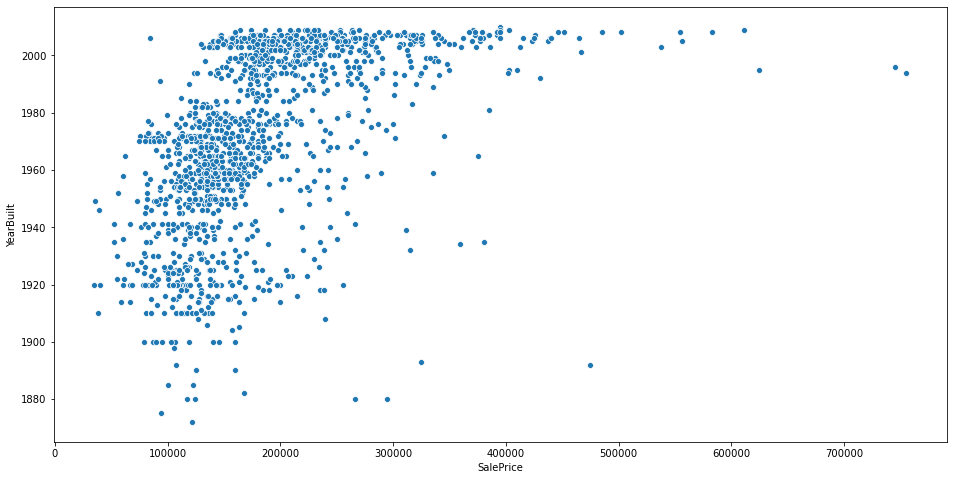

In [43]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'SalePrice' , y = 'YearBuilt' ,data = house_prices_df)
plt.show()

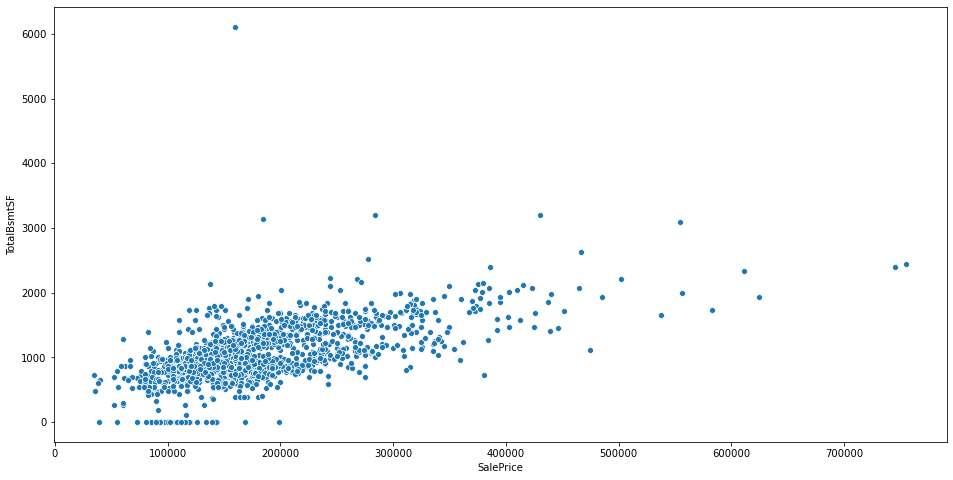

In [44]:
plt.figure(figsize=(16,8))
sns.scatterplot(x = 'SalePrice' , y = 'TotalBsmtSF' , data = house_prices_df)
plt.show()

In [45]:
house_price.groupby(by=['MSZoning','Neighborhood','YrSold'])['SalePrice'].mean()

MSZoning  Neighborhood  YrSold
C (all)   IDOTRR        2006       71655.500000
                        2008       60500.000000
                        2009       59950.000000
                        2010       75723.000000
          OldTown       2007      133900.000000
                                      ...      
RM        OldTown       2008      149395.833333
                        2009      117428.950000
                        2010      120807.692308
          Sawyer        2006      125000.000000
                        2010      112000.000000
Name: SalePrice, Length: 166, dtype: float64

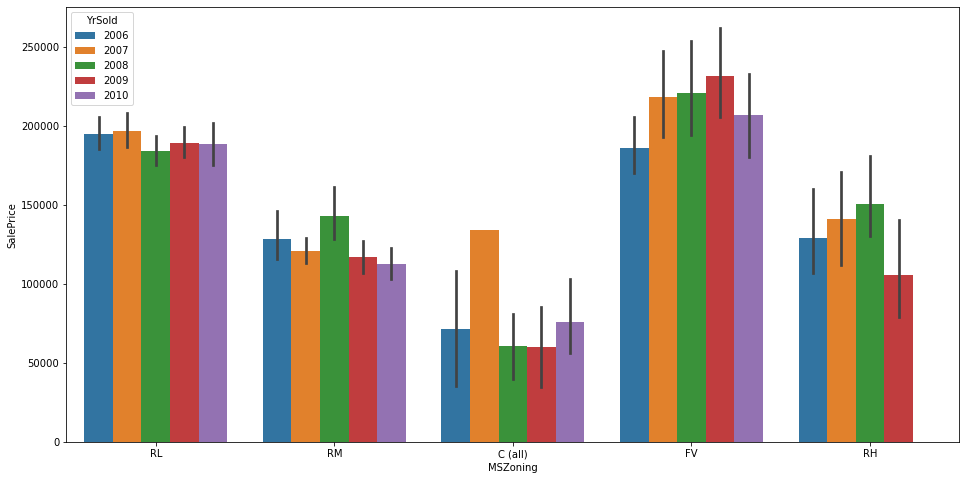

In [46]:
plt.figure(figsize=(16,8))
sns.barplot(x = 'MSZoning' , y = 'SalePrice' , hue = 'YrSold' , data = house_prices_df)
plt.show()

In [47]:
for col in house_price.select_dtypes(include='object'):
    df = pd.DataFrame(house_price[col].unique())
    df.columns = [col]
    for i in house_price[col].unique():
        house_price.loc[house_price[col] == i , col+'_num'] = df[df[col] == i ].index[0]


In [48]:
house_price

,MSSubClass,MSZoning,LotArea,Street,LotShape,Neighborhood,BldgType,GrLivArea,OverallQual,YearBuilt,...,MSZoning_num,Street_num,LotShape_num,Neighborhood_num,BldgType_num,RoofStyle_num,HouseStyle_num,Heating_num,SaleType_num,SaleCondition_num
0,60,RL,8450,Pave,Reg,CollgCr,1Fam,1710,7,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,RL,9600,Pave,Reg,Veenker,1Fam,1262,6,1976,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,60,RL,11250,Pave,IR1,CollgCr,1Fam,1786,7,2001,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,RL,9550,Pave,IR1,Crawfor,1Fam,1717,7,1915,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,RL,14260,Pave,IR1,NoRidge,1Fam,2198,8,2000,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Gilbert,1Fam,1647,6,1999,...,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,20,RL,13175,Pave,Reg,NWAmes,1Fam,2073,6,1978,...,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
1457,70,RL,9042,Pave,Reg,Crawfor,1Fam,2340,7,1941,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,20,RL,9717,Pave,Reg,NAmes,1Fam,1078,5,1950,...,0.0,0.0,0.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0


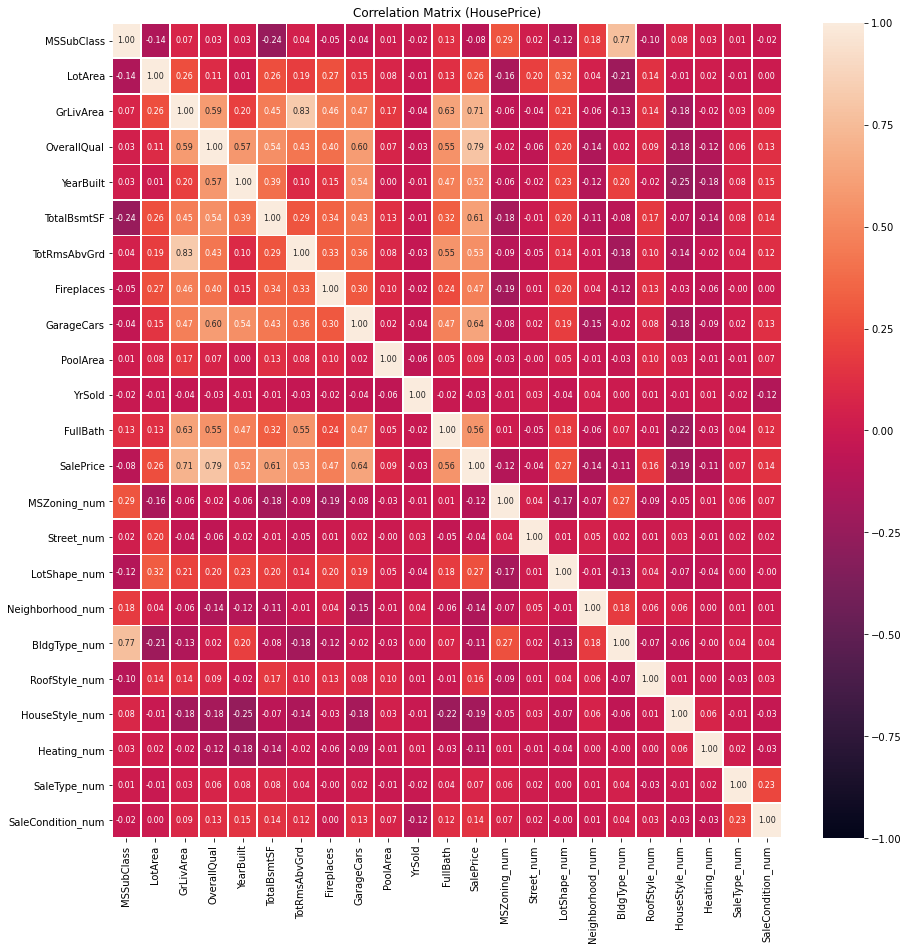

In [49]:
corr = house_price.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr,annot=True, fmt='.2f', annot_kws={"size": 8}, linewidths=.8, vmin=-1, vmax=1)
plt.title("Correlation Matrix (HousePrice)")
plt.show()

__(3) Build your initial model using these features and estimate the parameters using OLS.__

In [50]:
house_price

,MSSubClass,MSZoning,LotArea,Street,LotShape,Neighborhood,BldgType,GrLivArea,OverallQual,YearBuilt,...,MSZoning_num,Street_num,LotShape_num,Neighborhood_num,BldgType_num,RoofStyle_num,HouseStyle_num,Heating_num,SaleType_num,SaleCondition_num
0,60,RL,8450,Pave,Reg,CollgCr,1Fam,1710,7,2003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,20,RL,9600,Pave,Reg,Veenker,1Fam,1262,6,1976,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2,60,RL,11250,Pave,IR1,CollgCr,1Fam,1786,7,2001,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,70,RL,9550,Pave,IR1,Crawfor,1Fam,1717,7,1915,...,0.0,0.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0
4,60,RL,14260,Pave,IR1,NoRidge,1Fam,2198,8,2000,...,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,7917,Pave,Reg,Gilbert,1Fam,1647,6,1999,...,0.0,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,20,RL,13175,Pave,Reg,NWAmes,1Fam,2073,6,1978,...,0.0,0.0,0.0,6.0,0.0,0.0,1.0,0.0,0.0,0.0
1457,70,RL,9042,Pave,Reg,Crawfor,1Fam,2340,7,1941,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,20,RL,9717,Pave,Reg,NAmes,1Fam,1078,5,1950,...,0.0,0.0,0.0,11.0,0.0,1.0,1.0,0.0,0.0,0.0


In [51]:
house_price.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'Neighborhood', 'BldgType', 'GrLivArea', 'OverallQual', 'YearBuilt',
       'RoofStyle', 'HouseStyle', 'TotalBsmtSF', 'Heating', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'PoolArea', 'YrSold', 'SaleType',
       'SaleCondition', 'FullBath', 'SalePrice', 'MSZoning_num', 'Street_num',
       'LotShape_num', 'Neighborhood_num', 'BldgType_num', 'RoofStyle_num',
       'HouseStyle_num', 'Heating_num', 'SaleType_num', 'SaleCondition_num'],
      dtype='object')

In [71]:
import statsmodels.api as sm

In [72]:
Y = house_price['SalePrice']
X = house_price[['LotArea','BldgType_num','GrLivArea','YearBuilt', 'OverallQual', 
                 'TotalBsmtSF', 'GarageCars']]
X = sm.add_constant(X)
results = sm.OLS(Y , X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.779
Method:                 Least Squares   F-statistic:                     734.5
Date:                Fri, 14 May 2021   Prob (F-statistic):               0.00
Time:                        19:52:15   Log-Likelihood:                -17439.
No. Observations:                1460   AIC:                         3.489e+04
Df Residuals:                    1452   BIC:                         3.494e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -8.204e+05   8.49e+04     -9.666      0.000   -9.87e+05   -6.54e+05
LotArea          0.5426      0.106      5.136      0.000       0.335       0.750
BldgType_num -6095.9478    970.552     -6.281      0.000   -7999.782   -4192.114
GrLivArea       47.1553      2.544     18.537      0.000      42.165      52.145
YearBuilt      379.2687     44.641      8.496      0.000     291.701     466.837
OverallQual   2.126e+04   1134.320     18.746      0.000     1.9e+04    2.35e+04
TotalBsmtSF     25.0935      2.816      8.912      0.000      19.570      30.617
GarageCars      1.3e+04   1785.862      7.280      0.000    9498.425    1.65e+04
==============================================================================
Omnibus:                      450.238   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55732.441
Skew:                          -0.251   Prob(JB):                         0.00
Kurtosis:                      33.264   Cond. No.                     1.27e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.27e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""